# This is Jeopardy!

#### Overview

This project is slightly different than others you have encountered thus far. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill all of these requirements, and you should expect to use the internet, Codecademy, and/or other resources when you encounter a problem that you cannot easily solve.

#### Project Goals

You will work to write several functions that investigate a dataset of _Jeopardy!_ questions and answers. Filter the dataset for topics that you're interested in, compute the average difficulty of those questions, and train to become the next Jeopardy champion!

## Prerequisites

In order to complete this project, you should have completed the Pandas lessons in the <a href="https://www.codecademy.com/learn/paths/analyze-data-with-python">Analyze Data with Python Skill Path</a>. You can also find those lessons in the <a href="https://www.codecademy.com/learn/data-processing-pandas">Data Analysis with Pandas course</a> or the <a href="https://www.codecademy.com/learn/paths/data-science/">Data Scientist Career Path</a>.

Finally, the <a href="https://www.codecademy.com/learn/practical-data-cleaning">Practical Data Cleaning</a> course may also be helpful.

## Project Requirements

1. We've provided a csv file containing data about the game show _Jeopardy!_ in a file named `jeopardy.csv`. Load the data into a DataFrame and investigate its contents. Try to print out specific columns.

   Note that in order to make this project as "real-world" as possible, we haven't modified the data at all - we're giving it to you exactly how we found it. As a result, this data isn't as "clean" as the datasets you normally find on Codecademy. More specifically, there's something odd about the column names. After you figure out the problem with the column names, you may want to rename them to make your life easier for the rest of the project.
   
   In order to display the full contents of a column, we've added this line of code for you:
   
   ```py
   pd.set_option('display.max_colwidth', None)
   ```

In [1]:
import pandas as pd
import re

pd.set_option('display.max_colwidth', None)

jeopardy=pd.read_csv('jeopardy.csv')
# print(jeopardy.head())

#5/30 正解有先把空格利用 columns.rename() 去掉（※因為沒有格線，要先反白才會發現。只是它說只有一個空格，是怎麼看出來的？）
jeopardy_reformatted=jeopardy.rename(columns={' Show Number':'Show Number',\
                                              ' Air Date':'Air Date',' Round':'Round',\
                                              ' Category':'Category',' Value':'Value',\
                                              ' Question':'Question',' Answer':'Answer'})
# print(f"這是去空格版：\n{jeopardy_reformatted}")
#5/30 為何"\s字串"沒發揮去空格效果
print(jeopardy_reformatted['Value'].head(150))

0      $200
1      $200
2      $200
3      $200
4      $200
       ... 
145    $500
146    $200
147    $200
148    $200
149    $200
Name: Value, Length: 150, dtype: object


2. Write a function that filters the dataset for questions that contains all of the words in a list of words. For example, when the list `["King", "England"]` was passed to our function, the function returned a DataFrame of 49 rows. Every row had the strings `"King"` and `"England"` somewhere in its `" Question"`.

   Test your function by printing out the column containing the question of each row of the dataset.

In [2]:
import re
def extract_rows_with_all_kws(text_to_check,kw_list):
    #寫一個 lambda 將「包含所有 kws」的 question 挑出
#     has_all_kws=lambda x: word in x for word in kw_list#第一次寫漏了 "all"
    has_all_kws=lambda x:all(word in x for word in kw_list)
#     return qualified_df= text_to_check.apply(has_all_kws)#應該改成「return 符合lambda 的列的位置」
    return text_to_check.loc[text_to_check['Question'].apply(has_all_kws)]

#一定要用apply 嗎
jeopardy_reformatted.loc\
[jeopardy_reformatted['Question'].apply(lambda x:all(word in x for word in ['king','England']))]


,Show Number,Air Date,Round,Category,Value,Question,Answer
6337,3517,1999-12-14,Double Jeopardy!,Y1K,$800,"In retaliation for Viking raids, this ""Unready"" king of England attacks Norse areas of the Isle of Man",Ethelred
9191,3907,2001-09-04,Double Jeopardy!,WON THE BATTLE,$800,This king of England beat the odds to trounce the French in the 1415 Battle of Agincourt,Henry V
11710,2903,1997-03-26,Double Jeopardy!,BRITISH MONARCHS,$600,"This Scotsman, the first Stuart king of England, was called ""The Wisest Fool in Christendom""",James I
13454,4726,2005-03-07,Jeopardy!,A NUMBER FROM 1 TO 10,$1000,It's the number that followed the last king of England named William,4
14445,1103,1989-05-24,Jeopardy!,FAMOUS QUOTES,$300,"Nelson said, ""England expects that every man will do"" this & died thanking God he did his",his duty
...,...,...,...,...,...,...,...
208295,4621,2004-10-11,Jeopardy!,THE VIKINGS,$600,In 1066 this great-great grandson of Rollo made what some call the last Viking invasion of England,William the Conqueror
208742,4863,2005-11-02,Double Jeopardy!,BEFORE & AFTER,"$3,000",Dutch-born king who ruled England jointly with Mary II & is a tasty New Zealand fish,William of Orange roughy
213870,5856,2010-02-15,Double Jeopardy!,URANUS,$1600,In 1781 William Herschel discovered Uranus & initially named it after this king of England,George III
216021,1881,1992-11-09,Double Jeopardy!,HISTORIC NAMES,$1000,"His nickname was ""Bertie"", but he used this name & number when he became king of England in 1901",Edward VII


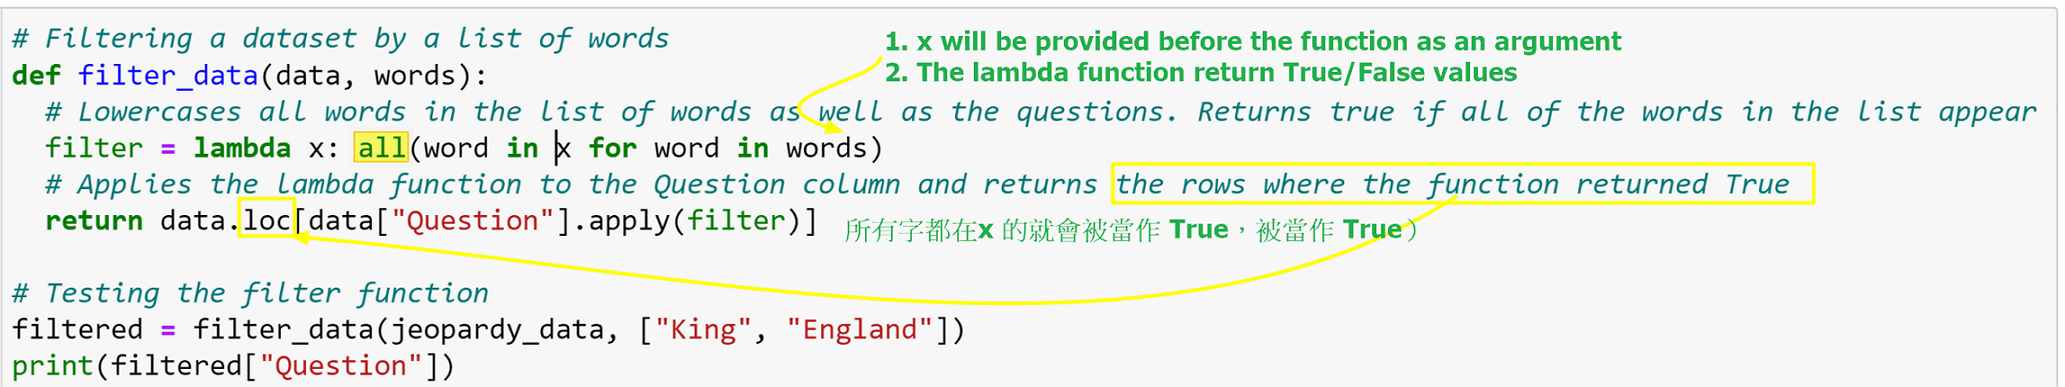

3. Test your original function with a few different sets of words to try to find some ways your function breaks. Edit your function so it is more robust.

   For example, think about capitalization. We probably want to find questions that contain the word `"King"` or `"king"`.
   
   You may also want to check to make sure you don't find rows that contain substrings of your given words. For example, our function found a question that didn't contain the word `"king"`, however it did contain the word `"viking"` &mdash; it found the `"king"` inside `"viking"`. Note that this also comes with some drawbacks &mdash; you would no longer find questions that contained words like `"England's"`.

In [3]:
print(extract_rows_with_all_kws(jeopardy_reformatted,[' first ',' marriage '])['Question'])

14149                                                 Her first marriage was to William Warren of Grand Rapids, Michigan
19942     This Irish novelist's July 4, 1931 marriage occurred 27 years & 18 days after the first date with his intended
28437               The public was surprised by Lyle Lovett's marriage to this actress; it was a first marriage for both
36474             "A Fool in Love" was the first big hit for this couple known for their stormy marriage & their "Revue"
72357                   Samuel Johnson called remarriage after an unhappy first marriage "The triumph of hope over" this
140308                                              The first line of this novel says, "It was Wang Lung's marriage day"
150218                On May 17, 2004 this eastern state became the first to issue marriage licenses to same-sex couples
169444                                         She spent her first years of marriage in China during the Boxer Rebellion
199864                   Inferti

4. We may want to eventually compute aggregate statistics, like `.mean()` on the `" Value"` column. But right now, the values in that column are strings. Convert the`" Value"` column to floats. If you'd like to, you can create a new column with float values.

   Now that you can filter the dataset of question, use your new column that contains the float values of each question to find the "difficulty" of certain topics. For example, what is the average value of questions that contain the word `"King"`?
   
   Make sure to use the dataset that contains the float values as the dataset you use in your filtering function.

In [4]:
jeopardy_reformatted_copy=jeopardy_reformatted
# jeopardy_reformatted_copy['values as floats']=\
# jeopardy_reformatted_copy.apply(lambda row:float(row['Value'][-(len(row['Value'])-1):]\
#                                                  .replace(",","")),axis=1)
#6/5 把apply 的對象改為欄位：
jeopardy_reformatted_copy['Value'].apply(lambda x:replace(x,",",""),axis=1)
#5/30 碰到 "one" 無法轉 float，但看不出為何CA的程式碼就不會出現這個問題
#5/30 I' m not sure why my original lambda didn't work. But anyway, below is CA's:
jeopardy_reformatted_copy["Float Value"] = jeopardy_reformatted_copy["Value"]\
.apply(lambda x: float(x[1:].replace(',','')) if x != "None" else 0)
#如果不是因為系統提醒我有個2,000 無法轉 float，我根本不會注意到。因此print head 似乎不大牢靠
#但即便我去 csv 檔搜尋了，仍沒看到 value 欄有"one"（Answer 欄有一個 "one"）
#5/30 Also, why doesn't CA's lambda function have "axis=1"?
print(jeopardy_reformatted_copy.head(10))

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [ ]:
#把用CA lambda 生成的 df 輸出，這樣或許比較了解這 lambda 到底做了什麼
jeopardy_reformatted_copy.to_csv(r'jeopardy_reformatted_copy.txt', header=None, index=None, sep=' ', mode='a')

5. Write a function that returns the count of unique answers to all of the questions in a dataset. For example, after filtering the entire dataset to only questions containing the word `"King"`, we could then find all of the unique answers to those questions. The answer "Henry VIII" appeared 55 times and was the most common answer.

In [ ]:
def extract_rows_with_all_kws(text_to_check,kw_list):
    has_all_kws=lambda x:all(word in x for word in kw_list)
    return text_to_check.loc[text_to_check['Question'].apply(has_all_kws)]#return 符合lambda 的列的位置」

#將 Questions 含有 ”king” 的另建 df
keyword_list=['king']
king_df=extract_rows_with_all_kws(jeopardy_reformatted_copy,keyword_list)

#Count unique answers in the selected data frame
freq_unique_answers=king_df['Answer'].nunique()

print(freq_unique_answers)

#Which answer appear most often?

Answer_as_list=king_df['Answer'].tolist()

#Find out the most frequent answer and its frequency
max_freq=0
for answer in Answer_as_list:
    if Answer_as_list.count(answer) >max_freq:
        max_freq=Answer_as_list.count(answer)
        most_frequent=answer

print(most_frequent)
print(max_freq)

6. Explore from here! This is an incredibly rich dataset, and there are so many interesting things to discover. There are a few columns that we haven't even started looking at yet. Here are some ideas on ways to continue working with this data:

 * Investigate the ways in which questions change over time by filtering by the date. How many questions from the 90s use the word `"Computer"` compared to questions from the 2000s?
 * Is there a connection between the round and the category? Are you more likely to find certain categories, like `"Literature"` in Single Jeopardy or Double Jeopardy?
 * Build a system to quiz yourself. Grab random questions, and use the <a href="https://docs.python.org/3/library/functions.html#input">input</a> function to get a response from the user. Check to see if that response was right or wrong.

In [ ]:
# How many questions from the 90s use the word "Computer" compared to questions from the 2000s?

res1=extract_rows_with_all_kws(jeopardy_reformatted,[' computer '])
res2=extract_rows_with_all_kws(jeopardy_reformatted,[' computers '])
res3=pd.concat([res1,res2])

res3.columns
#Find out those from the 90s and after the millenium(Air Date)
df_computer(s)_90s=res3.loc[res['Air Date'].apply(lambda x:x.str.contains("199") )]



    
#Find out how many times "Computer" appeared in questions from the 90s

#Find out how many times "Computer" appeared in questions since the millenium.


#Is there a connection between the round and the category? 
#Are you more likely to find certain categories, like "Literature"\
#in Single Jeopardy or Double Jeopardy?

#Build a system to quiz yourself. Grab random questions, 
#and use the input function to get a response from the user. 
#Check to see if that response was right or wrong.

### Solution

7. Compare your program to our <a href="https://content.codecademy.com/PRO/independent-practice-projects/jeopardy/jeopardy_solution.zip">sample solution code</a> - remember, that your program might look different from ours (and probably will) and that's okay!

8. Great work! Visit <a href="https://discuss.codecademy.com/t/this-is-jeopardy-challenge-project-python-pandas/462365">our forums</a> to compare your project to our sample solution code. You can also learn how to host your own solution on GitHub so you can share it with other learners! Your solution might look different from ours, and that's okay! There are multiple ways to solve these projects, and you'll learn more by seeing others' code.